In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from gekko import GEKKO

plt.style.use('bmh')

# Solver selection

solve $y^2 = 1$ with APOPT solver.

In [2]:
m = GEKKO() # create model
y = m.Var(value=2) # create variable y=2
m.Equation(y**2 == 1) # define equation
m.options.SOLVER = 1 # 1: APOPT, 2: BPOPT, 3: IPOPT default is 3.

In [3]:
m.solve()

apm 124.120.13.111_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            1
   Intermediates:            0
   Connections  :            0
   Equations    :            1
   Residuals    :            1
 
 Number of state variables:              1
 Number of total equations: -            1
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  5.62500E-21  3.75000E-01
    1  5.06250E-22  1.40625E-01
    2  6.09849E-24  1.26562E-02
 

In [4]:
y.value

[1.0000000465]

# Solve linear equations

$$3x + 2y = 1$$
$$x + 2y = 0$$

In [5]:
m = GEKKO()
x = m.Var()
y = m.Var()
m.Equations([3*x + 2*y == 1,
             x + 2*y == 0])

In [6]:
m.solve()

apm 124.120.13.111_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            2
   Intermediates:            0
   Connections  :            0
   Equations    :            2
   Residuals    :            2
 
 Number of state variables:              2
 Number of total equations: -            2
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program 

In [7]:
print(x.value, y.value)

[0.5] [-0.25]


In [8]:
# we can use inequality as well
m = GEKKO()
x = m.Var()
y = m.Var()
z = m.Var()
m.Obj(x**2) # objective for inequality case --> minimize x**2
m.Equations([3*x + 2*y == 1,
             x + 2*y < 0,
             x + z == 0])

In [9]:
m.solve()

apm 124.120.13.111_gk_model2 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            0
   Equations    :            4
   Residuals    :            4
 
 Number of state variables:              4
 Number of total equations: -            3
 Number of slack variables: -            1
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program 

In [10]:
print(x.value, y.value, z.value)

[0.49999999531] [-0.24999999297] [-0.49999999531]


# Solve Non-linear equations

$$x + 2y = 0$$
$$x^2 + y^2 = 1$$

In [11]:
m = GEKKO()
x = m.Var(value=1)
y = m.Var(value=1)
m.Equations([x + 2*y == 0,
             x**2 + y**2 == 1])

In [12]:
m.solve()

apm 124.120.13.111_gk_model3 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            2
   Intermediates:            0
   Connections  :            0
   Equations    :            2
   Residuals    :            2
 
 Number of state variables:              2
 Number of total equations: -            2
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program co

In [13]:
print(x.value, y.value)

[0.894427191] [-0.4472135955]


In [14]:
m = GEKKO()
x = m.Var()
y = m.Var()
m.Obj(x) # minimize x
# m.Obj(-x) # maximize x
m.Equations([x + 2*y == 0,
             x**2 + y**2 < 1])

In [15]:
m.solve()

apm 124.120.13.111_gk_model4 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            3
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:              3
 Number of total equations: -            2
 Number of slack variables: -            1
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program 

In [16]:
print(x.value, y.value)

[-0.89442719403] [0.44721359701]


# Interpolation with Cubic Spline

In [17]:
xs = np.array([0,1,2,3,4,5])
ys = np.array([0.1,0.2,0.3,0.5,1.0,0.9])

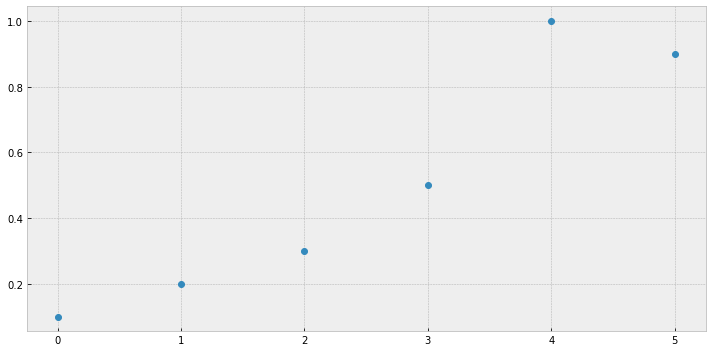

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(xs, ys, marker='o', linestyle='')
plt.tight_layout()
plt.show()

In [19]:
# Interpolation

m = GEKKO(remote=False) # solve locally is faster
m.x = m.Param(value=np.linspace(0, 5, 100))
m.y = m.Var()
m.options.IMODE = 2
m.cspline(m.x, m.y, xs, ys)
m.solve()

 ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            2
   Intermediates:            0
   Connections  :            2
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:            100
 Number of total equations: -          100
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Model Parameter Estimation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  2.16125E-35  1.03449E+00
    1  2.16125E-35  1.03449E+00
 Succ

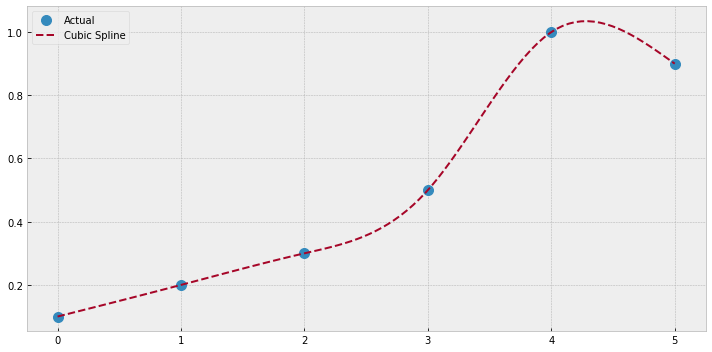

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(xs ,ys, linestyle='', marker='o', markersize=10, label='Actual')
ax.plot(m.x, m.y, linestyle='--', label='Cubic Spline')
ax.legend()
plt.tight_layout()
plt.show()

In [21]:
# find maximum point

p = GEKKO(remote=False)
p.x = p.Var(lb=0, ub=5) # set lower/upper bound
p.y = p.Var()
p.Obj(-p.y) # maxmimize y
p.cspline(p.x, p.y, xs, ys)
p.solve()

 ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            2
   Intermediates:            0
   Connections  :            2
   Equations    :            1
   Residuals    :            1
 
 Number of state variables:              2
 Number of total equations: -            1
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              1
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0 -1.08659E-01  1.00000E-01
    1 -5.92987E-01  9.73350E-07
    2 

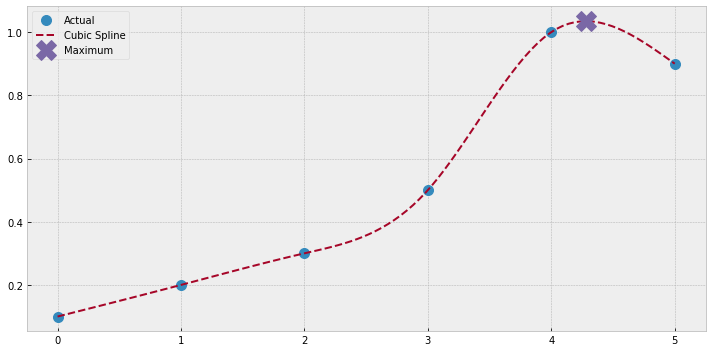

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(xs ,ys, linestyle='', marker='o', markersize=10, label='Actual')
ax.plot(m.x, m.y, linestyle='--', label='Cubic Spline')
ax.plot(p.x, p.y, linestyle='', marker='X', label='Maximum', markersize=20)
ax.legend()
plt.tight_layout()
plt.show()

# Linear and Polynomial Regression

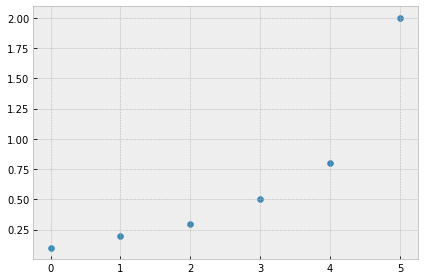

In [23]:
xs = np.array([0,1,2,3,4,5])
ys = np.array([0.1,0.2,0.3,0.5,0.8,2.0])

plt.scatter(xs, ys)
plt.tight_layout()
plt.show()

In [24]:
m = GEKKO(remote=False)
m.options.IMODE = 2
c = [m.FV(value=0) for i in range(4)] # Fixed variables --> 4 coefficients for cubic
x = m.Param(value=xs) 
y = m.CV(value=ys) # Fixed variables
y.FSTATUS = 1 # feedback status
m.Equation(y == c[0] + c[1]*x + c[2]*x**2 + c[3]*x**3)

In [25]:
# Linear regression
# set only the first two coefficents to active
c[0].STATUS = 1
c[1].STATUS = 1
m.solve(disp=False)
p1 = [c[1].value[0],c[0].value[0]]

# Quadratic
c[2].STATUS = 1 
m.solve(disp=False)
p2 = [c[2].value[0],c[1].value[0],c[0].value[0]]

# Cubic
c[3].STATUS = 1  
m.solve(disp=False)
p3 = [c[3].value[0],c[2].value[0],c[1].value[0],c[0].value[0]]

[0.2, -2.602085214e-18]
[0.11036094675, -0.17200473373, 0.1005]
[0.03, -0.11666666667, 0.21333333333, 0.0995]


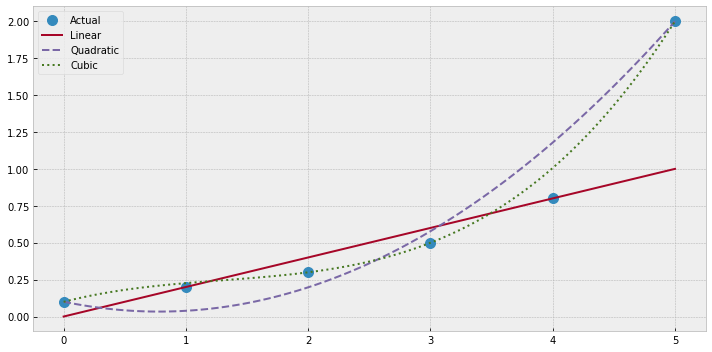

In [26]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(xs, ys, linestyle='', marker='o', markersize=10, label='Actual')

names = ['Linear', 'Quadratic', 'Cubic']
styles = ['-', '--', ':']
ps = [p1, p2, p3]
x_vals = np.linspace(0, 5, 100)
for i in range(len(names)):
    print(ps[i])
    ax.plot(x_vals, np.polyval(ps[i], x_vals), linestyle=styles[i], label=names[i])

ax.legend()
plt.tight_layout()
plt.show()

# Nonlinear Regression

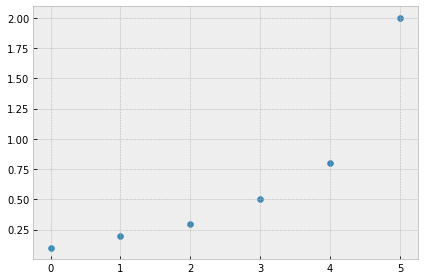

In [27]:
xs = np.array([0,1,2,3,4,5])
ys = np.array([0.1,0.2,0.3,0.5,0.8,2.0])

plt.scatter(xs, ys)
plt.tight_layout()
plt.show()

In [28]:
m = GEKKO(remote=False)

x = m.Param(value=xs)
a = m.FV()
a.STATUS = 1

y = m.CV(value=ys)
y.FSTATUS = 1

m.Equation(y == 0.1 * m.exp(a*x))
m.options.IMODE = 2
m.options.EV_TYPE = 2

In [29]:
m.solve()

 ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            3
   Intermediates:            0
   Connections  :            0
   Equations    :            1
   Residuals    :            1
 
 Number of state variables:              7
 Number of total equations: -            6
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              1
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Model Parameter Estimation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  6.99316E+01  9.50000E-01
    1  3.36638E+01  2.03003E-01
    2

In [30]:
a.value

[0.58628748154, 0.58628748154, 0.58628748154, 0.58628748154, 0.58628748154, 0.58628748154]

In [31]:
y.value

[0.1, 0.17973034917, 0.32302998414, 0.58058291843, 1.0434837065, 1.8754569093]

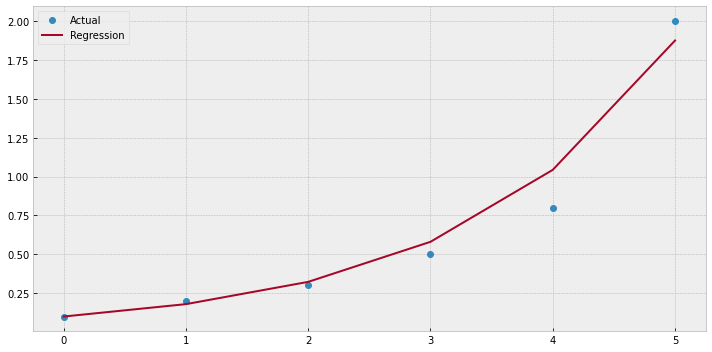

In [32]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(xs, ys, linestyle='', marker='o', label='Actual')
ax.plot(x, y, label='Regression')
ax.legend()

plt.tight_layout()
plt.show()

# Solve Differential Equations

$$ k \frac{dy}{dt} = -ty $$
$$ y(0) = 5 $$
where $k=10$ solve for time 0 to 20

In [33]:
m = GEKKO(remote=False)
k = 10
m.time = np.linspace(0, 20, 100)

y = m.Var(value=5)
t = m.Param(value=m.time)
m.Equation(k * y.dt() == -t * y)
m.options.IMODE = 4

In [34]:
m.solve()

 ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            2
   Intermediates:            0
   Connections  :            0
   Equations    :            1
   Residuals    :            1
 
 Number of state variables:            198
 Number of total equations: -          198
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Dynamic Simulation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  3.27323E-33  1.40467E+00
    1  3.27323E-33  1.40467E+00
 Successful s

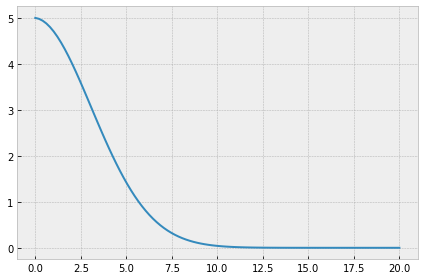

In [35]:
plt.plot(m.time, y.value)
plt.tight_layout()
plt.show()

# Nonlinear Programming Optimization

$$  min \quad x_1x_4(x_1+x_2+x_3)+x_3 $$
$$ subject \; to \quad x_1 x_2 x_3 x_4 \geq 25 $$
$$ x_1^2 + x_2^2 + x_3^2 + x_4^2 = 40 $$
$$ 1 \leq x_1, x_2, x_3, x_4 \leq 5 $$
$$ x_0 = (1,5,5,1) $$

In [36]:
m = GEKKO(remote=False)

x1 = m.Var(value=1, lb=1, ub=5)
x2 = m.Var(value=5, lb=1, ub=5)
x3 = m.Var(value=5, lb=1, ub=5)
x4 = m.Var(value=1, lb=1, ub=5)

m.Equation(x1*x2*x3*x4 >= 25)
m.Equation(x1**2 + x2**2 + x3**2 + x4**2 == 40)
m.Obj(x1*x4*(x1+x2+x3)+x3)

In [37]:
m.solve()

 ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:              5
 Number of total equations: -            2
 Number of slack variables: -            1
 ---------------------------------------
 Degrees of freedom       :              2
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  1.67676E+01  1.87500E-01
    1  2.04736E+01  4.88281E-02
    2 

In [38]:
print(x1.value, x2.value, x3.value, x4.value)

[1.0] [4.742999637] [3.8211499845] [1.3794082931]


# Mixed Integer Nonlinear Programming

$$  min \quad x_1x_4(x_1+x_2+x_3)+x_3 $$
$$ subject \; to \quad x_1 x_2 x_3 x_4 \geq 25 $$
$$ x_1^2 + x_2^2 + x_3^2 + x_4^2 = 40 $$
$$ 1 \leq x_1, x_2, x_3, x_4 \leq 5 $$
$$ x_3, x_4 \in \mathbb{Z} $$
$$ x_0 = (1,5,5,1) $$

In [39]:
m = GEKKO(remote=False)
m.options.SOLVER = 1 # APOPT is also the only solver that handles Mixed Integer problems.

x1 = m.Var(value=1, lb=1, ub=5)
x2 = m.Var(value=5, lb=1, ub=5)
x3 = m.Var(value=5, lb=1, ub=5, integer=True) # constraint to Integer
x4 = m.Var(value=1, lb=1, ub=5, integer=True)

m.Equation(x1*x2*x3*x4 >= 25)
m.Equation(x1**2 + x2**2 + x3**2 + x4**2 == 40)
m.Obj(x1*x4*(x1+x2+x3)+x3)

In [40]:
m.solve()

 ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:              5
 Number of total equations: -            2
 Number of slack variables: -            1
 ---------------------------------------
 Degrees of freedom       :              2
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
Iter:     1 I:  0 Tm:      0.00 NLPi:    7 Dpth:    0 Lvs:    3 Obj:  1.70E+01 Gap:       NaN
--Integer Solution:   1.75E+01 Lowest Leaf:   1.70E+01 Gap:   3.00E-02
Iter

In [41]:
print(f"X1: {x1.value[0]}\nX2: {x2.value[0]}\nX3: {x3.value[0]}\nX4: {x4.value[0]}")
print(f"Objective function value: {m.options.OBJFCNVAL}")

X1: 1.3589086474
X2: 4.5992789966
X3: 4.0
X4: 1.0
Objective function value: 17.532267301


# Optimal control with integral objective

$$min_u x_2(t_f)$$ <br>
subject to <br>
$$\frac{dx_1}{dt} = u$$ <br>
$$\frac{dx_2}{dt} = \frac{1}{2}x_1^2(t)$$
$$x_1(0)=1$$
$$x_2(0)=0$$
$$t_f=2$$
$$-1 \leq u_t \leq 1$$

In [42]:
m = GEKKO(remote=False)
m.time = np.linspace(0, 2, 100)

x1 = m.Var(value=1)
x2 = m.Var(value=0)
u = m.Var(value=0, lb=-1, ub=1)
p = np.zeros(100)
p[-1] = 1
final = m.Param(value=p)

m.Equation(x1.dt() == u)
m.Equation(x2.dt() == 0.5*x1**2)
m.Obj(x2*final) # Objective function
m.options.IMODE = 6 # optimal control mode

In [43]:
m.solve()

 ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:            495
 Number of total equations: -          396
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             99
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Dynamic Control with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  1.06561E+01  5.00000E-01
    1  5.72876E-01  4.25033E-02
    2 -1.47219E-

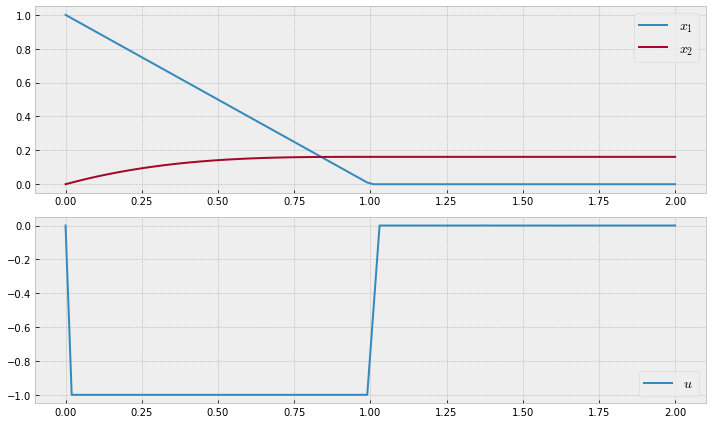

In [44]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

ax[0].plot(m.time, x1.value, label=r'$x_1$')
ax[0].plot(m.time, x2.value, label=r'$x_2$')
ax[0].legend(fontsize=14)

ax[1].plot(m.time, u.value, label=r'$u$')
ax[1].legend(fontsize=14)

plt.tight_layout()
plt.show()